<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/XGBoost_Credit_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install xgboost==1.3.3

In [45]:
!wget -O credit_default.xls https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

--2021-04-05 23:21:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘credit_default.xls’

credit_default.xls  100%[===================>]   5.28M  9.47MB/s    in 0.6s    

2021-04-05 23:21:38 (9.47 MB/s) - ‘credit_default.xls’ saved [5539328/5539328]



In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
import numpy as np


In [47]:
xgb.__version__

'1.3.3'

In [48]:
data=pd.read_excel('credit_default.xls',skiprows=1)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [49]:
data=data.rename({'default payment next month':'default'}, axis=1)

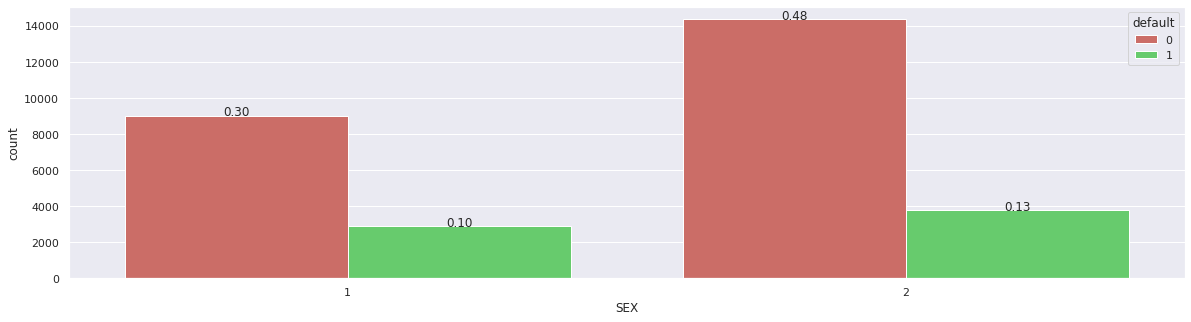

In [50]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="SEX", hue="default", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/data.shape[0]),
            ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


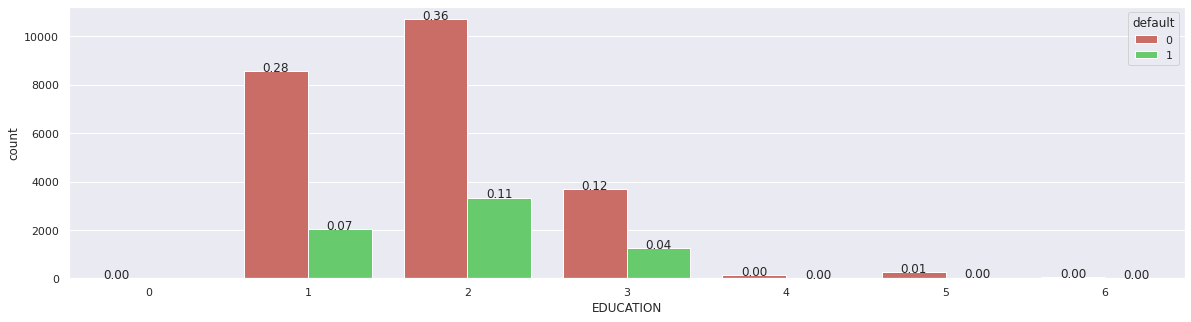

In [51]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="EDUCATION", hue="default", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/data.shape[0]),
            ha="center") 

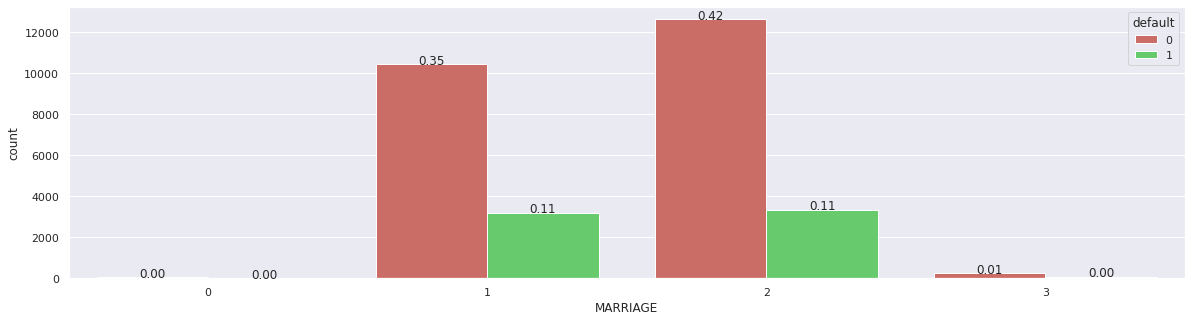

In [52]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="MARRIAGE", hue="default", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/data.shape[0]),
            ha="center") 

In [53]:
data=data.drop(['ID'], axis=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [54]:
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [56]:
cred_def_X = data.copy()
cred_def_y = cred_def_X.pop('default')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(cred_def_X, cred_def_y, train_size=0.75, test_size=0.25)

In [58]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [59]:
num_round = 200
maxdepth = 6
param = {
  'colsample_bylevel': 1,
  'colsample_bytree': 1,
  'gamma': 0,
  'learning_rate': 0.1, 
  'random_state': 1010,
  'objective': 'binary:hinge', 
}

In [60]:
param['tree_method'] = 'gpu_hist'
param['grow_policy'] = 'depthwise'
param['max_depth'] = maxdepth
param['max_leaves'] = 0
param['verbosity'] = 0
param['gpu_id'] = 0
param['updater'] = 'grow_gpu_hist'
param['predictor'] = 'gpu_predictor'

gpu_result = {} 

# Training with the above parameters
bst=xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_result, verbose_eval=20)

[0]	test-error:0.77947
[20]	test-error:0.18867
[40]	test-error:0.18133
[60]	test-error:0.18040
[80]	test-error:0.18067
[100]	test-error:0.18120
[120]	test-error:0.18027
[140]	test-error:0.18107
[160]	test-error:0.18040
[180]	test-error:0.18053
[199]	test-error:0.18107


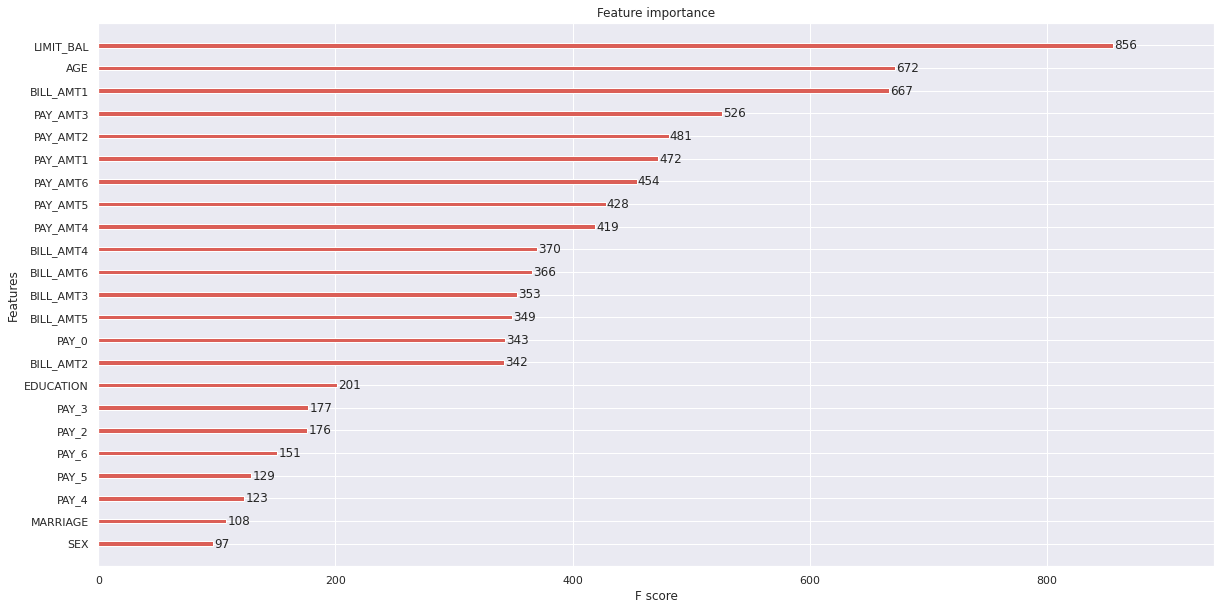

In [61]:
xgb.plot_importance(bst)

In [62]:
bst.predict(dtest)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [63]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(y_train),
                                             y_train))

In [64]:
class_weights

[0.6421965977851353, 2.258129265355279]

In [65]:
weights = np.ones(X_train.shape[0], dtype = 'float')

In [66]:
for i, val in enumerate(y_train):
    weights[i] = class_weights[val]

In [67]:
weights

array([2.25812927, 0.6421966 , 0.6421966 , ..., 0.6421966 , 0.6421966 ,
       0.6421966 ])

In [68]:
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, objective='binary:hinge', random_state=10)

In [69]:
xgb_clf.fit(X_train, y_train, sample_weight=weights)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, num_parallel_tree=1,
              objective='binary:hinge', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [70]:
predictions = xgb_clf.predict(X_test)

In [71]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[4551 1295]
 [ 623 1031]]


In [72]:
print('classification_report :\n',classification_report(y_test, predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      5846
           1       0.44      0.62      0.52      1654

    accuracy                           0.74      7500
   macro avg       0.66      0.70      0.67      7500
weighted avg       0.78      0.74      0.76      7500



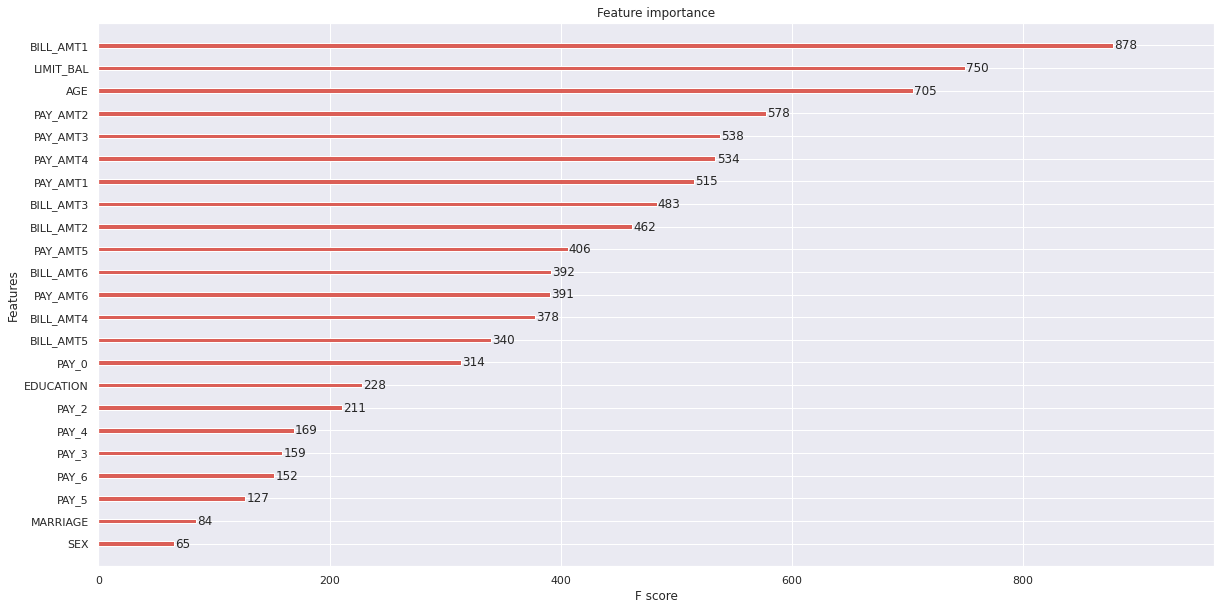

In [73]:
xgb.plot_importance(xgb_clf)

In [74]:
xgb_clf.save_model('cdefault.booster')

In [75]:
bst = xgb.Booster({'nthread': 4}) 
bst.load_model('cdefault.booster')  

In [76]:
xgb_loaded = xgb.XGBClassifier()
xgb_loaded._Booster = bst

In [77]:
xgb_loaded.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [78]:
!pip install shap

In [79]:
import shap

In [ ]:
explainer = shap.TreeExplainer(xgb_loaded)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)